In [2]:
import numpy as np
import pandas as pd
from pandas.api.types import is_numeric_dtype
from sportsreference.ncaab.teams import Teams
from sportsreference.ncaab.teams import Team
from tqdm import tqdm
from sportsreference.ncaab.boxscore2 import Boxscore
import time
from sportsreference.ncaab.roster import Player
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
import basketball_functions as bb
big_ten_teams = ['Rutgers','Iowa','Wisconsin','Penn State','Nebraska','Illinois','Michigan State',
                'Ohio State','Michigan','Indiana','Northwestern','Minnesota','Maryland']
#sns.set(rc={'axes.facecolor':'#CEB888', 'figure.facecolor':"#CEB888"})
sns.reset_orig()
def calculate_posessions(fga,oreb,to,fta):
    raw_num = (fga-oreb) + to + (0.475*fta)
    return int(np.ceil(raw_num))

In [3]:
teams = Teams(2022)
purdue = teams("PURDUE")

# Individual Player Boxscores

In [4]:
purroster = purdue.roster.players
purdue_player_ids = [i.player_id for i in purroster]
player_df = pd.DataFrame()
for season in tqdm([2022]):
    #teams = Teams(season)
    #purdue = teams("PURDUE")
    for gm in purdue.schedule:
        try:
            box_idx = gm.boxscore_index
            home_players = Boxscore(box_idx).home_players
            away_players = Boxscore(box_idx).away_players
            for i in home_players:
                temp_df = i.dataframe
                temp_df['date'] = gm.date
                temp_df['season'] = season
                opp_name = gm.opponent_name
                if opp_name == 'Purdue':
                    temp_df['opponent'] = box_id[14:].replace("-","").title()
                else:
                    temp_df['opponent'] = gm.opponent_name
                player_df = pd.concat([player_df,temp_df])
            for j in away_players:
                temp_df = j.dataframe
                temp_df['date'] = gm.date
                temp_df['season'] = season
                opp_name = gm.opponent_name
                if opp_name == 'Purdue':
                    temp_df['opponent'] = box_id[14:].replace("-","").title()
                else:
                    temp_df['opponent'] = gm.opponent_name
                player_df = pd.concat([player_df,temp_df])
        except:
            pass

player_df = player_df.infer_objects()
player_df.date = pd.to_datetime(player_df.date)
player_df = player_df[player_df.index.isin(purdue_player_ids)]
player_df.head()

100%|██████████| 1/1 [00:52<00:00, 52.68s/it]


,assist_percentage,assists,block_percentage,blocks,defensive_rating,defensive_rebound_percentage,defensive_rebounds,effective_field_goal_percentage,field_goal_attempts,field_goal_percentage,field_goals,free_throw_attempt_rate,free_throw_attempts,free_throw_percentage,free_throws,minutes_played,offensive_rating,offensive_rebound_percentage,offensive_rebounds,personal_fouls,points,steal_percentage,steals,three_point_attempt_rate,three_point_attempts,three_point_percentage,three_pointers,total_rebound_percentage,total_rebounds,true_shooting_percentage,turnover_percentage,turnovers,two_point_attempts,two_point_percentage,two_pointers,usage_percentage,date,season,opponent
caleb-furst-1,5.6,1,0.0,0,107.0,26.1,6,0.333,3,0.333,1,0.000,0,NaN,0,27,87.0,17.8,3,2,2,0.0,0,0.667,2,0.000,0,22.6,9,0.333,40.0,2,1,1.0,1,9.2,2021-11-09,2022,Bellarmine
jaden-ivey-1,22.2,3,0.0,0,96.0,23.5,5,0.409,11,0.364,4,0.273,3,0.667,2,25,93.0,0.0,0,1,11,4.8,2,0.455,5,0.200,1,13.6,5,0.446,24.5,4,6,0.5,3,32.3,2021-11-09,2022,Bellarmine
sasha-stefanovic-1,27.8,3,0.0,0,113.0,9.8,2,1.063,8,0.750,6,0.875,7,0.857,6,24,222.0,0.0,0,2,23,0.0,0,0.750,6,0.833,5,5.6,2,1.038,0.0,0,2,0.5,1,22.9,2021-11-09,2022,Bellarmine
isaiah-thompson-1,33.9,4,0.0,0,115.0,4.9,1,0.833,9,0.556,5,0.000,0,NaN,0,24,204.0,0.0,0,1,15,0.0,0,0.889,8,0.625,5,2.8,1,0.833,0.0,0,1,0.0,0,18.6,2021-11-09,2022,Bellarmine
zach-edey-1,0.0,0,7.9,1,104.0,22.4,4,0.800,5,0.800,4,2.000,10,0.800,8,21,140.0,38.1,5,1,16,0.0,0,0.000,0,NaN,0,29.1,9,0.851,24.2,3,5,0.8,4,29.2,2021-11-09,2022,Bellarmine


# Overall Team Boxscore Per Game

In [6]:
player_list = player_df.index.unique().tolist()

In [16]:
player_ind_df = None
for player in player_list:
    temp_df = Player(player).dataframe
    temp_df['name'] = Player(player).name
    player_ind_df = pd.concat([player_ind_df,temp_df])

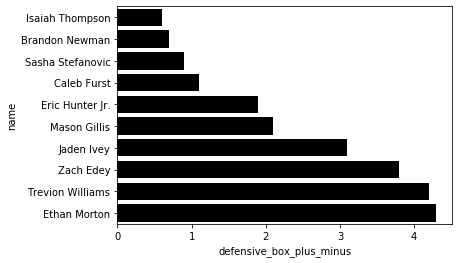

In [36]:
test = player_ind_df.rename_axis('season').reset_index()
test = test[test.season == '2021-22']
test = test[test.minutes_played >= 100]
sns.barplot(data = test.sort_values('defensive_box_plus_minus'),
           x = 'defensive_box_plus_minus',
           y = 'name',
           color = 'black');

In [3]:
box_df = None
for season in [2022]:
    #teams = Teams(season)
    #purdue = teams("PURDUE")
    for gm in tqdm(purdue.schedule):
        if gm.boxscore_index is not None:
            box_idx = gm.boxscore_index
        temp_df = pd.DataFrame(Boxscore(box_idx).dataframe)
        temp_df['season'] = season
        box_df = pd.concat([box_df,temp_df])
box_df.head()

100%|██████████| 30/30 [00:39<00:00,  1.32s/it]


,away_assist_percentage,away_assists,away_block_percentage,away_blocks,away_defensive_rating,away_defensive_rebound_percentage,away_defensive_rebounds,away_effective_field_goal_percentage,away_field_goal_attempts,away_field_goal_percentage,away_field_goals,away_free_throw_attempt_rate,away_free_throw_attempts,away_free_throw_percentage,away_free_throws,away_losses,away_minutes_played,away_offensive_rating,away_offensive_rebound_percentage,away_offensive_rebounds,away_personal_fouls,away_points,away_ranking,away_steal_percentage,away_steals,away_three_point_attempt_rate,away_three_point_field_goal_attempts,away_three_point_field_goal_percentage,away_three_point_field_goals,away_total_rebound_percentage,away_total_rebounds,away_true_shooting_percentage,away_turnover_percentage,away_turnovers,away_two_point_field_goal_attempts,away_two_point_field_goal_percentage,away_two_point_field_goals,away_win_percentage,away_wins,date,home_assist_percentage,home_assists,home_block_percentage,home_blocks,home_defensive_rating,home_defensive_rebound_percentage,home_defensive_rebounds,home_effective_field_goal_percentage,home_field_goal_attempts,home_field_goal_percentage,home_field_goals,home_free_throw_attempt_rate,home_free_throw_attempts,home_free_throw_percentage,home_free_throws,home_losses,home_minutes_played,home_offensive_rating,home_offensive_rebound_percentage,home_offensive_rebounds,home_personal_fouls,home_points,home_ranking,home_steal_percentage,home_steals,home_three_point_attempt_rate,home_three_point_field_goal_attempts,home_three_point_field_goal_percentage,home_three_point_field_goals,home_total_rebound_percentage,home_total_rebounds,home_true_shooting_percentage,home_turnover_percentage,home_turnovers,home_two_point_field_goal_attempts,home_two_point_field_goal_percentage,home_two_point_field_goals,home_win_percentage,home_wins,location,losing_abbr,losing_name,pace,winner,winning_abbr,winning_name,season
2021-11-09-19-purdue,62.5,15,5.0,1,143.3,48.0,12,0.508,59,0.407,24,0.136,8,0.875,7,0,200,100.0,20.6,7,20,67,None,7.5,5,0.593,35,0.343,12,32.2,19,0.533,13.8,10,24,0.500,12,0.0,0,"November 9, 2021",75.0,21,12.5,3,100.0,79.4,27,0.643,56,0.500,28,0.518,29,0.828,24,0,200,143.3,52.0,13,13,96,7,10.4,7,0.643,36,0.444,16,67.8,40,0.688,14.9,12,20,0.600,12,0.0,0,"Mackey Arena, West Lafayette, Indiana",BELLARMINE,Bellarmine,67.3,Home,PURDUE,Purdue,2022
2021-11-12-20-purdue,56.0,14,0.0,0,124.3,62.1,18,0.438,64,0.391,25,0.219,14,0.786,11,0,200,90.5,21.6,8,25,67,None,5.4,4,0.406,26,0.231,6,39.4,26,0.474,13.6,11,38,0.500,19,0.0,0,"November 12, 2021",61.3,19,21.1,8,90.5,78.4,29,0.603,58,0.534,31,0.552,32,0.688,22,0,200,124.3,37.9,11,14,92,7,8.1,6,0.345,20,0.400,8,60.6,40,0.628,14.3,12,38,0.605,23,0.0,0,"Mackey Arena, West Lafayette, Indiana",INDIANA-STATE,Indiana State,73.9,Home,PURDUE,Purdue,2022
2021-11-16-19-purdue,44.4,8,0.0,0,128.0,48.6,17,0.347,59,0.305,18,0.237,14,0.786,11,0,200,69.3,14.6,6,17,52,None,8.0,6,0.441,26,0.192,5,30.3,23,0.396,18.7,15,33,0.394,13,0.0,0,"November 16, 2021",51.4,18,12.1,4,69.3,85.4,35,0.604,67,0.522,35,0.313,21,0.714,15,0,200,128.0,51.4,18,15,96,6,12.0,9,0.418,28,0.393,11,69.7,53,0.624,18.2,17,39,0.615,24,0.0,0,"Mackey Arena, West Lafayette, Indiana",WRIGHT-STATE,Wright State,75.3,Home,PURDUE,Purdue,2022
2021-11-20-16-north-carolina,61.8,21,5.0,2,105.0,77.1,27,0.639,61,0.557,34,0.361,22,0.682,15,0,200,116.3,4.0,1,16,93,6,7.5,6,0.377,23,0.435,10,46.7,28,0.651,11.3,9,38,0.632,24,0.0,0,"November 20, 2021",41.9,13,13.2,5,116.3,96.0,24,0.536,69,0.449,31,0.174,12,0.833,10,0,200,105.0,22.9,8,20,84,18,3.8,3,0.420,29,0.414,12,53.3,32,0.562,15.9,14,40,0.475,19,0.0,0,"Mohegan Sun Arena, Uncasville, Connecticut",NORTH-CAROLINA,UNC,80.1,Away,PURDUE,Purdue,2022
2021-11-21-13-purdue,57.7,15,6.3,2,127.0,59.1,13,0.560,58,0.448,26,0.293,17,0.529,9,0,200,117.5,23.3,7,15,74,5,6.3,4,0.586,34,0.382,13,38.5,20,0.560,5.8,4,24,0.542,13,0.0,0,"November 21, 2021",58.6,17,4.2,1,117.5,76.7,23,0.618,55,0.527,29,0.255,14,0.857,12,0,200,1

In [20]:
purdue_df = bb.transform_box_df(box_df)
purdue_df = purdue_df[purdue_df.team == 'Purdue']
purdue_df['result'] = np.where(purdue_df.result == 1,"W","L")
stat_list = purdue_df.columns.tolist()[5:]
stat_list.remove("result")
stat_list.remove("wins")
stat_list.remove("win_percentage")
purdue_df['possessions'] = purdue_df.apply(lambda x: calculate_posessions(x.field_goal_attempts,
                                                                        x.offensive_rebounds,
                                                                        x.turnovers,
                                                                        x.free_throw_attempts),axis = 1)
purdue_df['opponent_possessions'] = purdue_df.apply(lambda x: calculate_posessions(x.opponent_field_goal_attempts,
                                                                        x.opponent_offensive_rebounds,
                                                                        x.opponent_turnovers,
                                                                        x.opponent_free_throw_attempts),axis = 1)
purdue_df['possession_differential'] = purdue_df['possessions'] - purdue_df['opponent_possessions']

In [46]:
wl_dict = dict(zip(purdue_df.opponent,purdue_df.result))
wl_dict

{'Bellarmine': 'W',
 'Indiana State': 'W',
 'Wright State': 'W',
 'UNC': 'W',
 'Villanova': 'W',
 'Omaha': 'W',
 'Florida State': 'W',
 'Iowa': 'W',
 'Rutgers': 'L',
 'NC State': 'W',
 'Butler': 'W',
 'Incarnate Word': 'W',
 'Nicholls State': 'W',
 'Wisconsin': 'L',
 'Penn State': 'W',
 'Nebraska': 'W',
 'Illinois': 'W',
 'Indiana': 'L',
 'Northwestern': 'W'}

# Scratchpad

Do whatever you want here

In [ ]:
for stat in purdue_df.columns.tolist()[5:]:
    if is_numeric_dtype(purdue_df[stat]):
        plt.figure(figsize = (10,8))
        sns.barplot(data = purdue_df.sort_values(stat),
                   x = stat,
                   y = 'opponent',
                   orient = 'h',
                   hue = 'result',
                   dodge = False,
                   palette = ['#CEB888','#000000'],
                   hue_order = ['W','L'])
        plt.title(f"Purdue {stat.replace('_',' ').title()} Per Game",{'fontsize':14})
        plt.show();

In [21]:
tre_df = player_df[player_df.index.str.contains("eric")]
#tre_df['result'] = tre_df.opponent.map(wl_dict)
tre_df['game_num'] = [i+1 for i in range(0,len(tre_df))]
tre_df['last_6_games'] = tre_df.game_num.map(lambda x: "Last 6 Games" if x >= 17 else 'First 16 Games')
tre_df = tre_df.infer_objects()
tre_df


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,assist_percentage,assists,block_percentage,blocks,defensive_rating,defensive_rebound_percentage,defensive_rebounds,effective_field_goal_percentage,field_goal_attempts,field_goal_percentage,field_goals,free_throw_attempt_rate,free_throw_attempts,free_throw_percentage,free_throws,minutes_played,offensive_rating,offensive_rebound_percentage,offensive_rebounds,personal_fouls,points,steal_percentage,steals,three_point_attempt_rate,three_point_attempts,three_point_percentage,three_pointers,total_rebound_percentage,total_rebounds,true_shooting_percentage,turnover_percentage,turnovers,two_point_attempts,two_point_percentage,two_pointers,usage_percentage,date,season,opponent,game_num,last_6_games
eric-hunterjr-1,8.8,1,0.0,0,106.0,6.2,1,0.500,6,0.333,2,0.000,0,NaN,0,19,146.0,0.0,0,0,6,3.1,1,1.000,6,0.333,2,3.6,1,0.500,0.0,0,0,NaN,0,15.6,2021-11-09,2022,Bellarmine,1,First 16 Games
eric-hunterjr-1,20.4,3,0.0,0,103.0,5.7,1,0.000,2,0.000,0,0.000,0,NaN,0,19,48.0,0.0,0,1,0,0.0,0,0.500,1,0.000,0,3.2,1,0.000,50.0,2,1,0.000,0,10.0,2021-11-12,2022,Indiana State,2,First 16 Games
eric-hunterjr-1,20.9,4,0.0,0,77.0,4.2,1,0.250,4,0.250,1,0.000,0,NaN,0,23,136.0,5.0,1,1,2,2.3,1,0.250,1,0.000,0,4.6,2,0.250,0.0,0,3,0.333,1,7.5,2021-11-16,2022,Wright State,3,First 16 Games
eric-hunterjr-1,0.0,0,0.0,0,104.0,9.5,2,1.000,2,1.000,2,2.000,4,0.50,2,24,158.0,0.0,0,0,6,4.2,2,0.000,0,NaN,0,5.6,2,0.798,0.0,0,2,1.000,2,7.9,2021-11-20,2022,North Carolina,4,First 16 Games
eric-hunterjr-1,7.3,1,0.0,0,126.0,14.0,2,0.000,1,0.000,0,4.000,4,0.75,3,19,89.0,9.6,1,2,3,0.0,0,1.000,1,0.000,0,12.1,3,0.543,42.0,2,0,NaN,0,13.9,2021-11-21,2022,Villanova,5,First 16 Games
eric-hunterjr-1,15.0,2,0.0,0,74.0,0.0,0,0.500,4,0.500,2,0.000,0,NaN,0,18,117.0,8.9,1,0,4,0.0,0,0.000,0,NaN,0,3.1,1,0.500,20.0,1,4,0.500,2,13.6,2021-11-26,2022,Omaha,6,First 16 Games
eric-hunterjr-1,14.5,2,0.0,0,107.0,0.0,0,0.667,3,0.667,2,0.000,0,NaN,0,18,121.0,0.0,0,1,4,0.0,0,0.000,0,NaN,0,0.0,0,0.667,25.0,1,3,0.667,2,11.4,2021-11-30,2022,Florida State,7,First 16 Games
eric-hunterjr-1,17.2,2,0.0,0,102.0,4.5,1,0.375,4,0.250,1,0.500,2,0.50,1,24,55.0,0.0,0,1,4,0.0,0,0.750,3,0.333,1,2.5,1,0.410,45.0,4,1,0.000,0,18.2,2021-12-03,2022,Iowa,8,First 16 Games
eric-hunterjr-1,7.0,1,0.0,0,105.0,7.7,1,0.500,6,0.333,2,0.000,0,NaN,0,26,110.0,4.8,1,0,6,4.5,2,0.667,4,0.500,2,5.9,2,0.500,14.3,1,2,0.000,0,13.5,2021-12-09,2022,Rutgers,9,First 16 Games
eric-hunterjr-1,0.0,0,0.0,0,98.0,0.0,0,0.333,3,0.333,1,0.000,0,NaN,0,29,51.0,5.0,1,1,2,4.0,2,0.667,2,0.000,0,2.5,1,0.333,40.0,2,1,1.000,1,9.1,2021-12-12,2022,NC State,10,First 16 Games


In [22]:
grouped = tre_df.groupby('last_6_games').mean()
grouped.reset_index()

,last_6_games,assist_percentage,assists,block_percentage,blocks,defensive_rating,defensive_rebound_percentage,defensive_rebounds,effective_field_goal_percentage,field_goal_attempts,field_goal_percentage,field_goals,free_throw_attempt_rate,free_throw_attempts,free_throw_percentage,free_throws,minutes_played,offensive_rating,offensive_rebound_percentage,offensive_rebounds,personal_fouls,points,steal_percentage,steals,three_point_attempt_rate,three_point_attempts,three_point_percentage,three_pointers,total_rebound_percentage,total_rebounds,true_shooting_percentage,turnover_percentage,turnovers,two_point_attempts,two_point_percentage,two_pointers,usage_percentage,season,game_num
0,First 16 Games,12.987500,1.687500,0.45,0.0625,103.375,5.425,0.875,0.379688,3.312500,0.334313,1.1875,0.4500,0.750000,0.550000,0.437500,20.125000,100.187500,4.606250,0.625000,0.8125,3.250000,1.400000,0.562500,0.444875,1.5625,0.222167,0.4375,4.887500,1.500000,0.399750,24.037500,1.187500,1.750000,0.380929,0.75,12.087500,2022.0,8.5
1,Last 6 Games,15.083333,2.666667,0.00,0.0000,112.500,7.350,1.500,0.710000,5.333333,0.585833,3.5000,0.4365,1.666667,0.666667,1.166667,28.333333,136.833333,1.583333,0.333333,1.5000,9.666667,1.416667,0.666667,0.334167,2.0000,0.833400,1.5000,4.566667,1.833333,0.705667,14.166667,0.833333,3.333333,0.605667,2.00,12.866667,2022.0,19.5


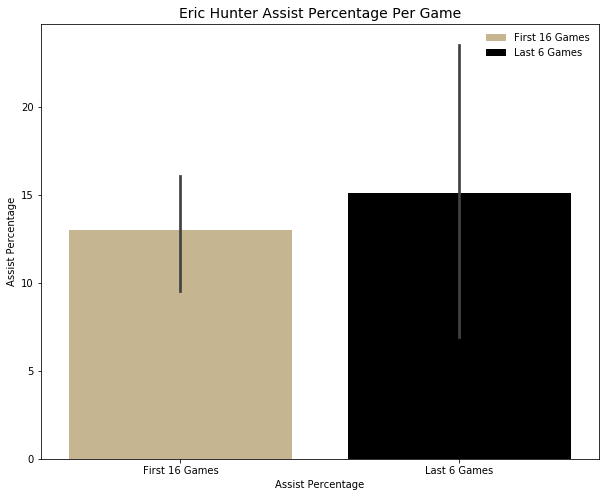

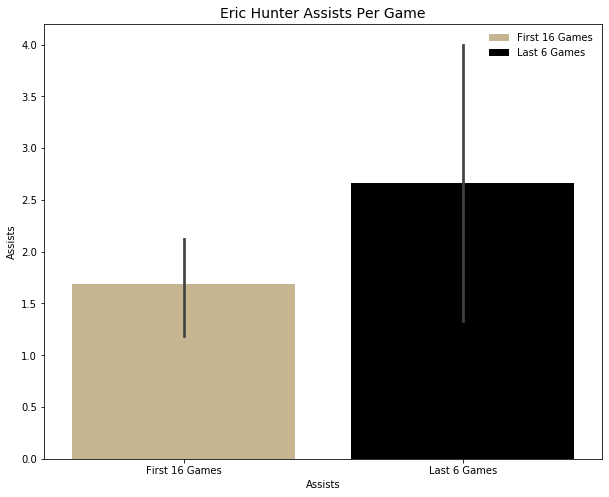

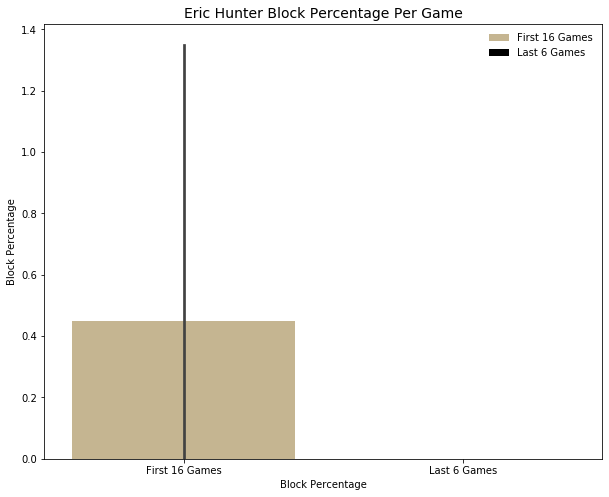

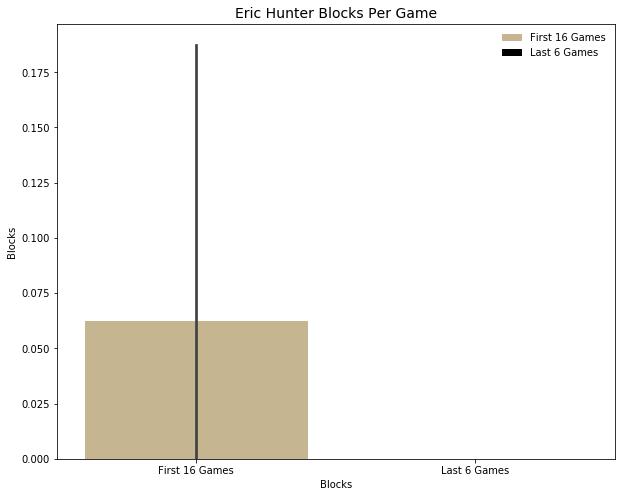

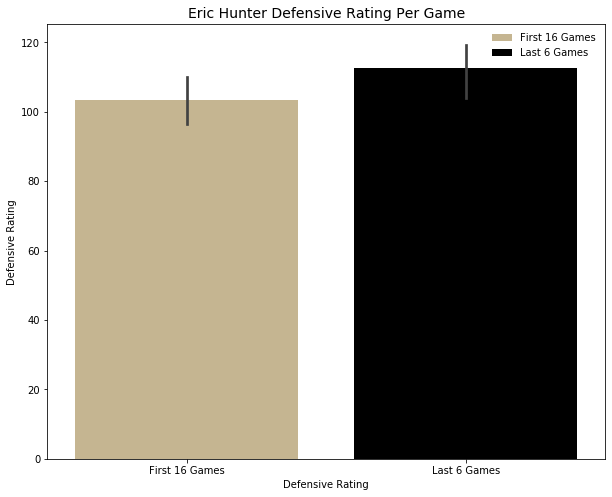

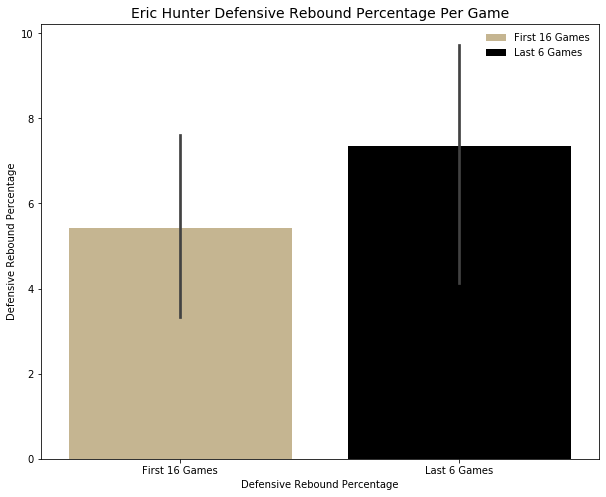

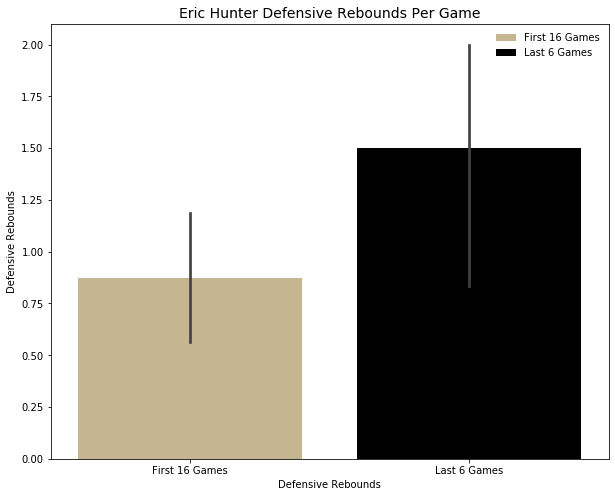

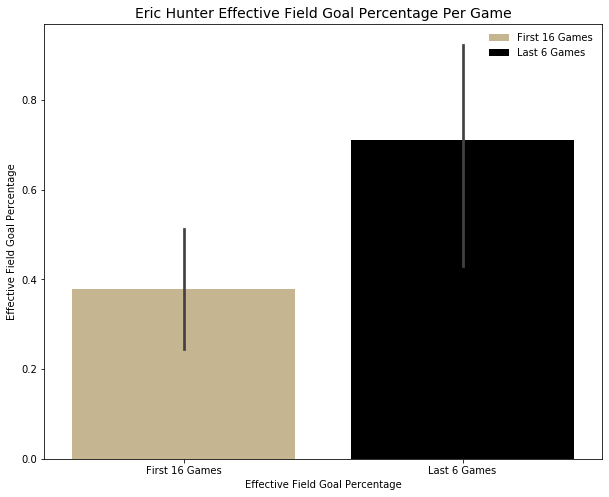

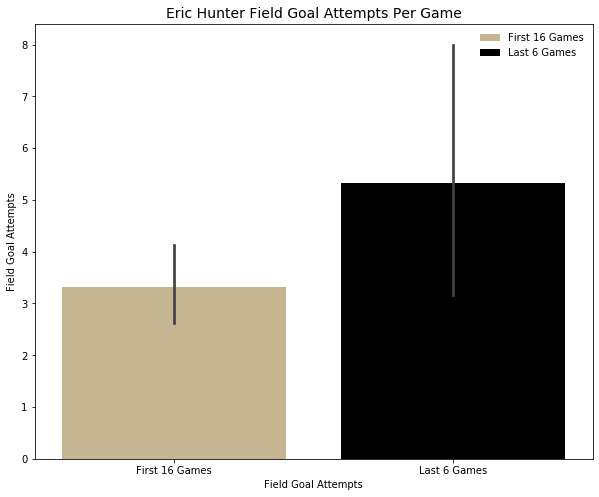

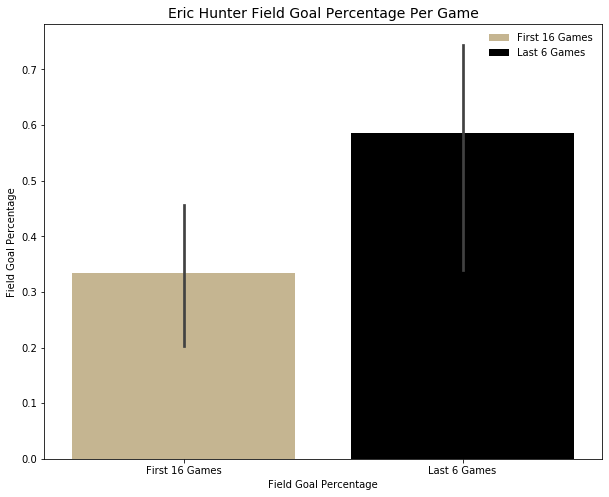

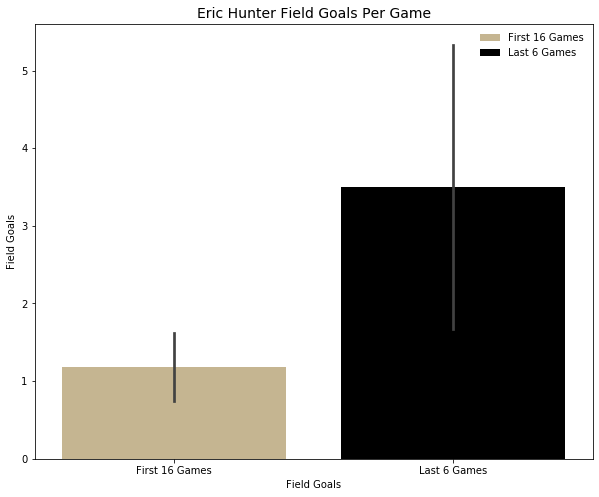

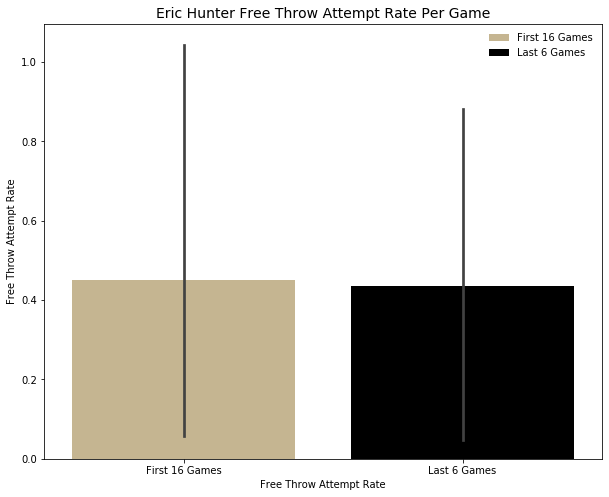

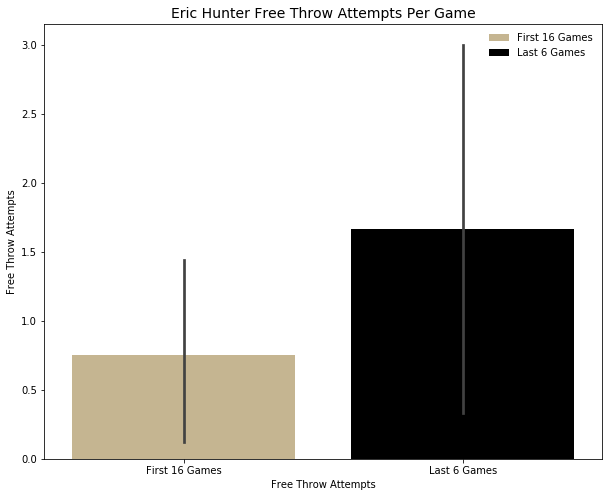

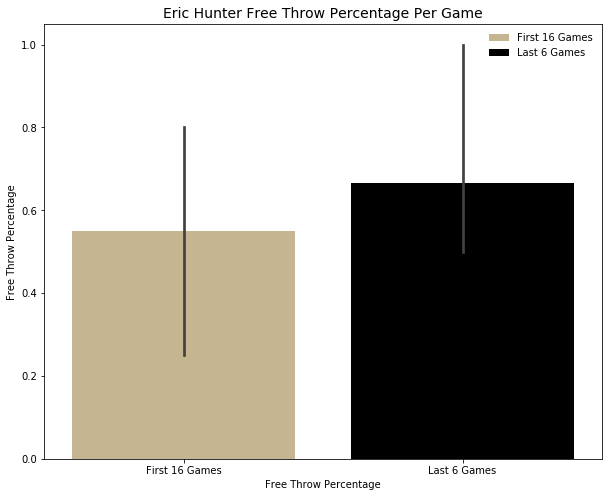

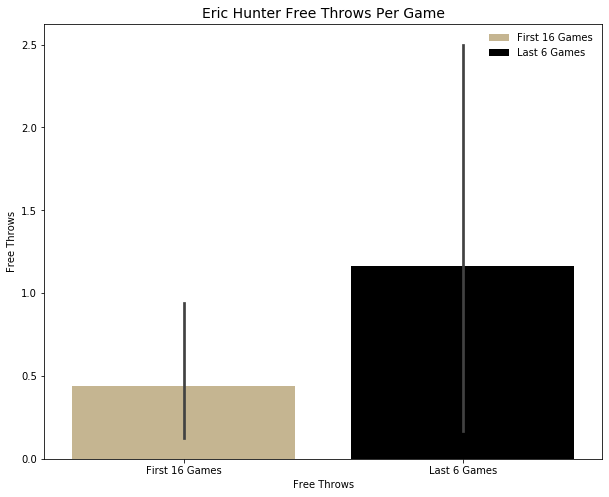

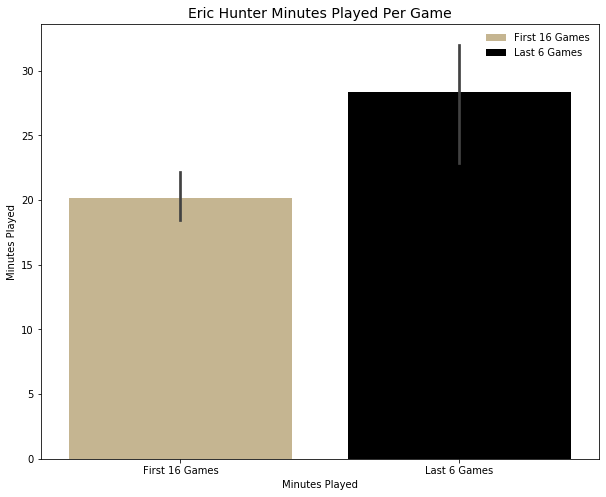

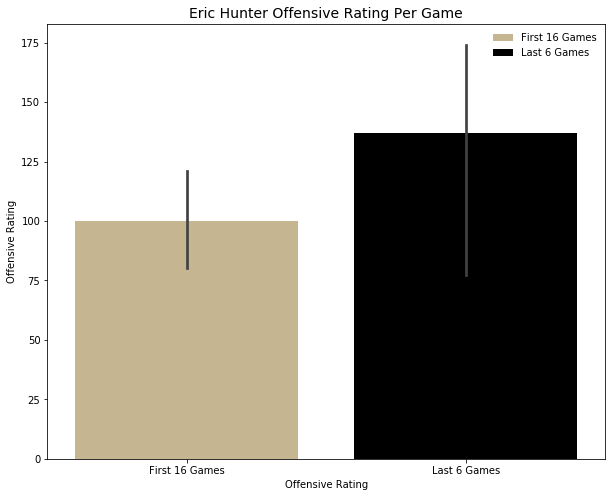

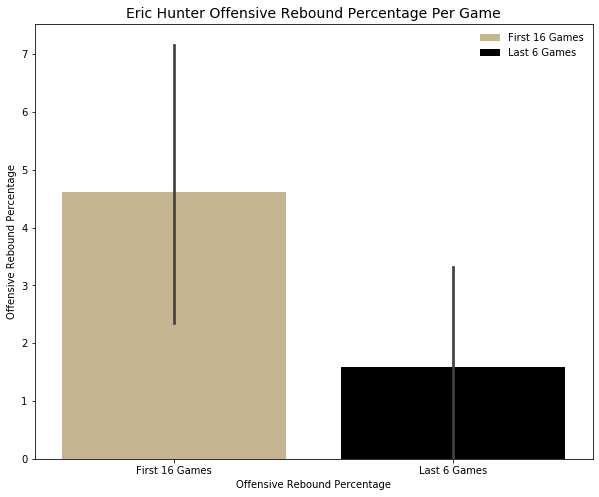

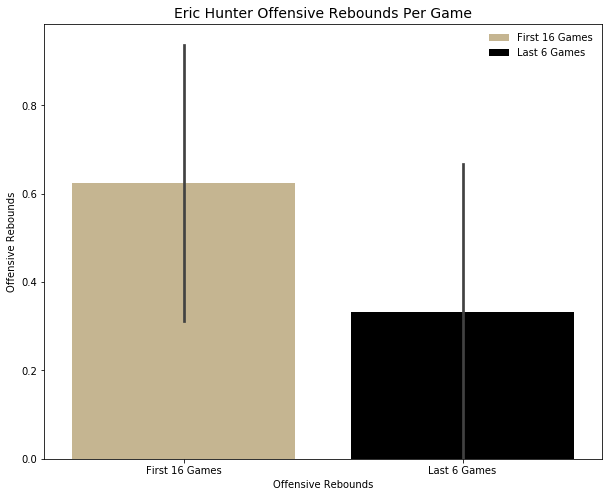

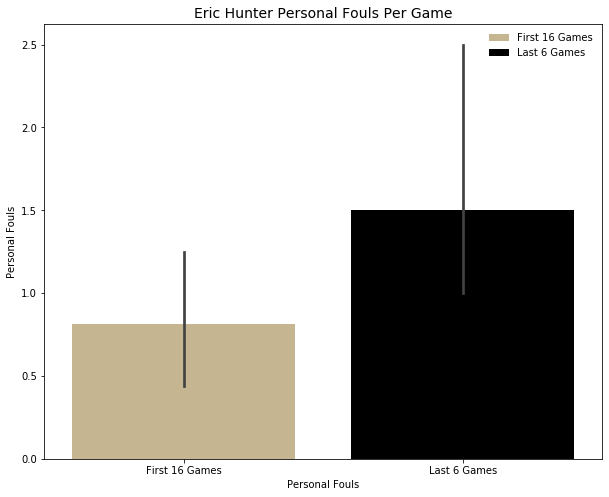

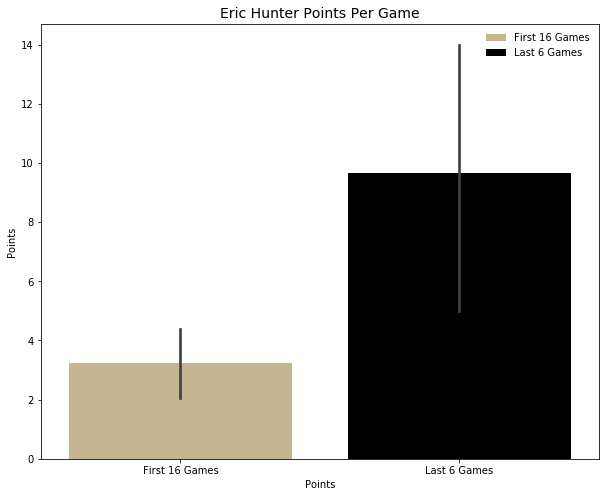

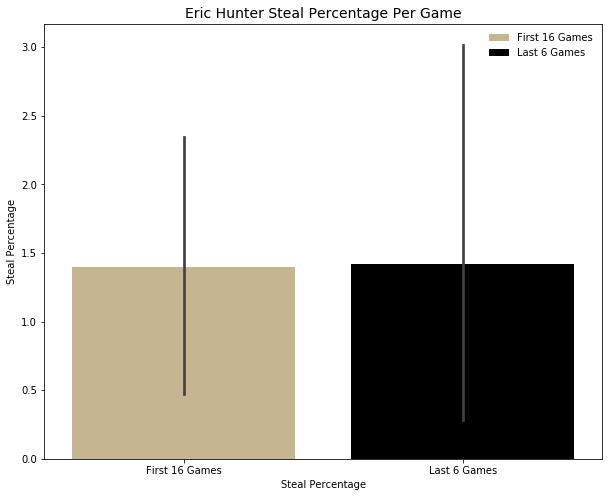

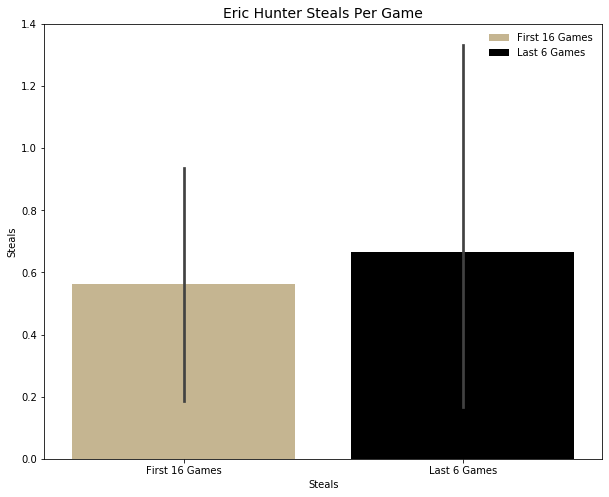

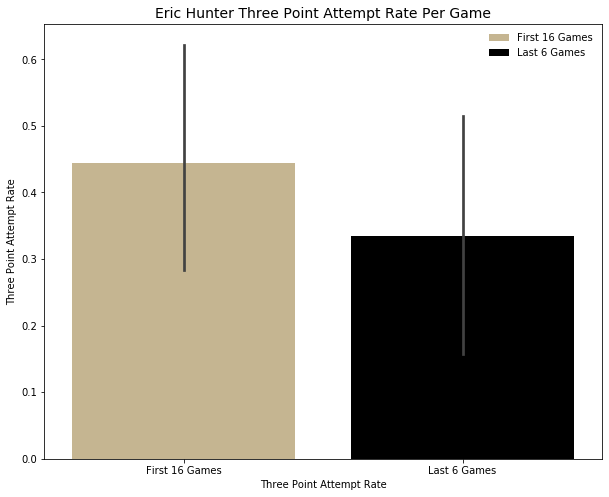

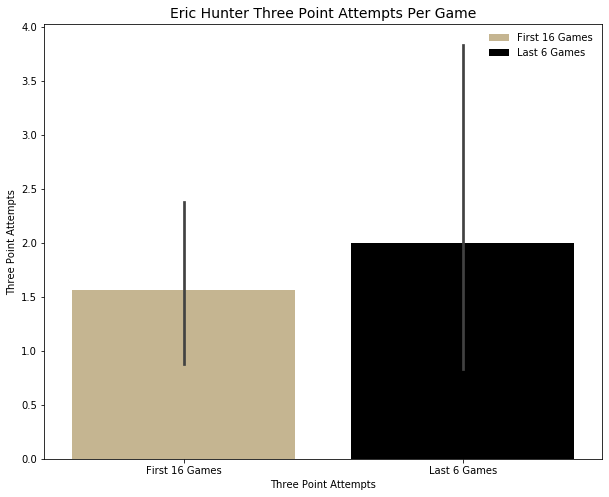

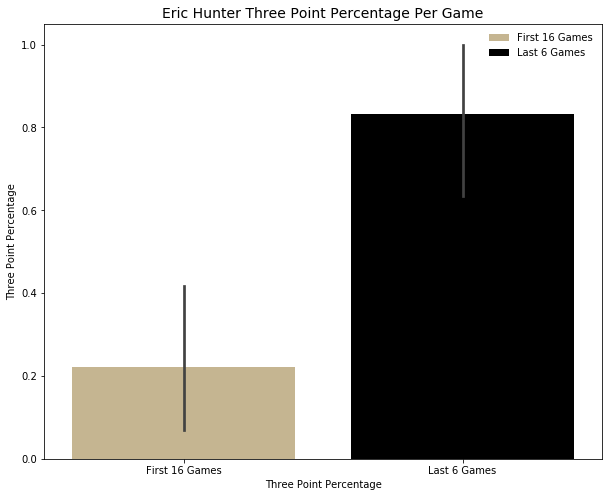

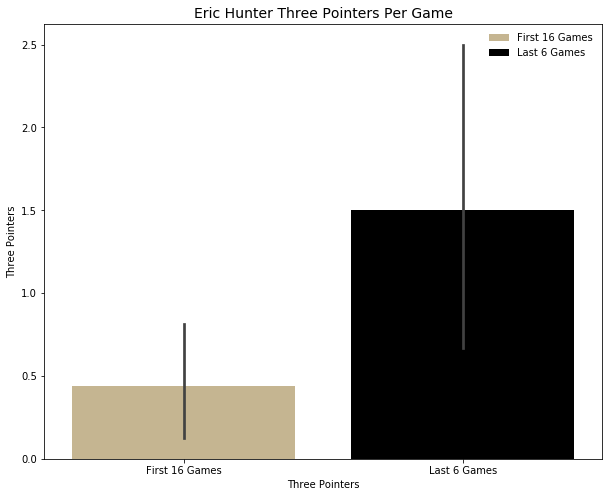

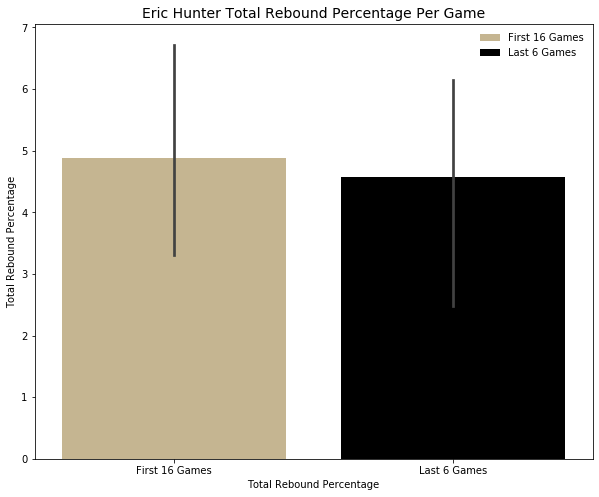

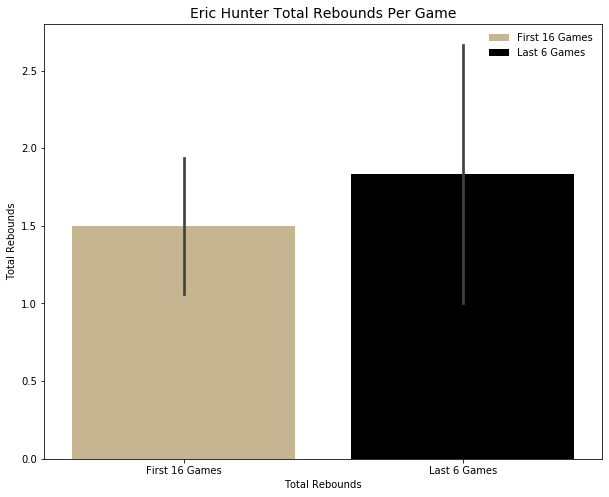

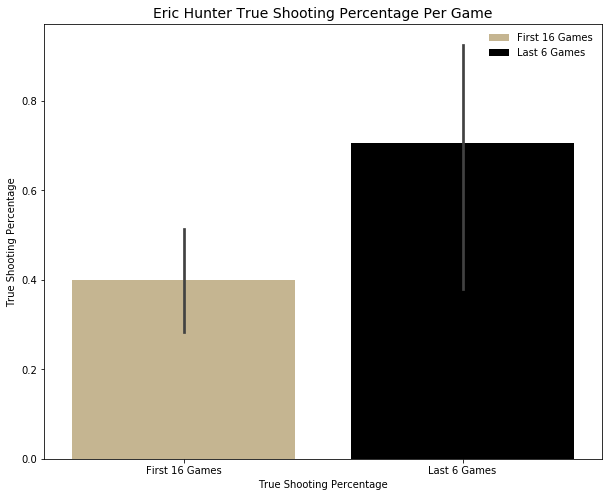

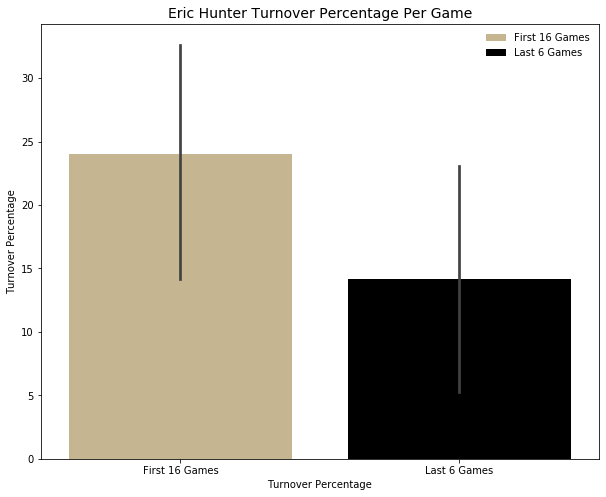

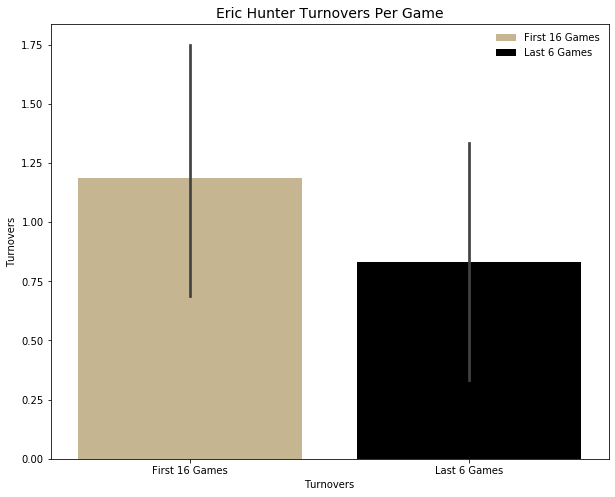

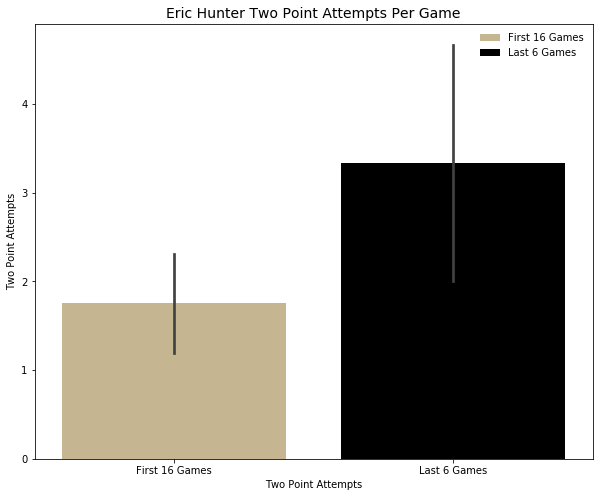

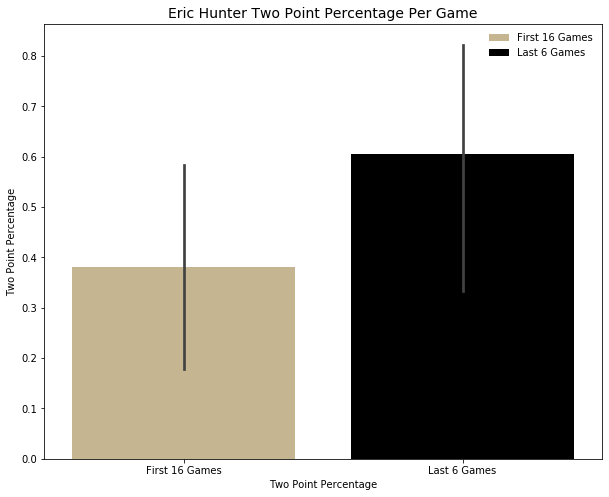

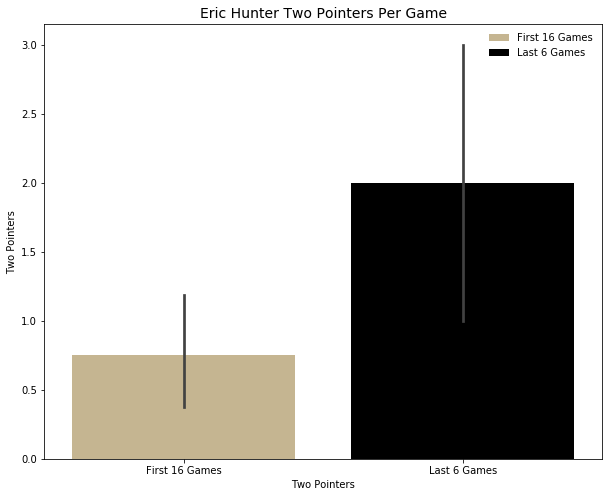

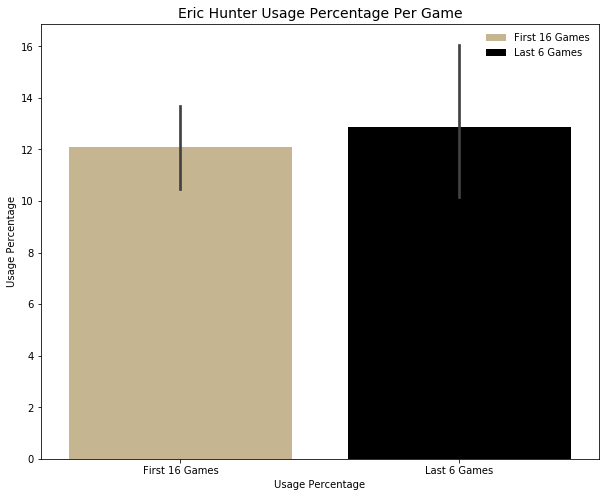

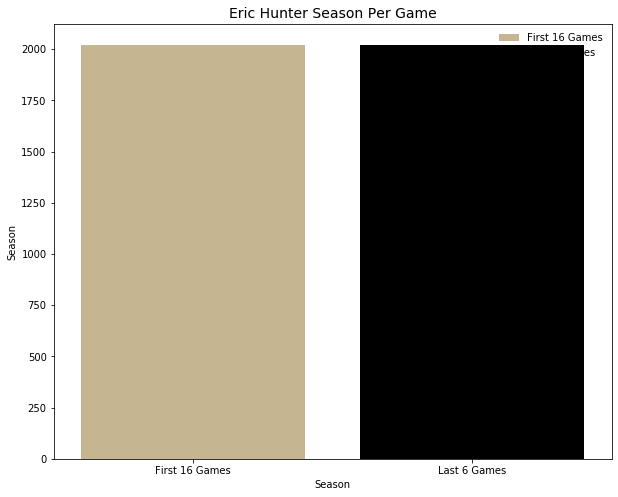

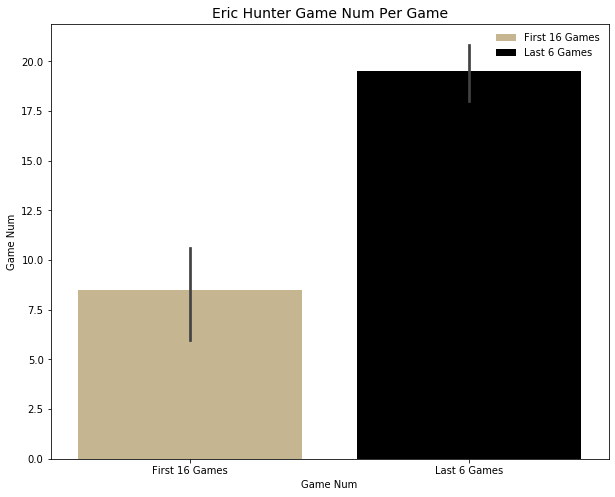

In [29]:
for stat in grouped.columns.tolist():
    if is_numeric_dtype(tre_df[stat]):
        plt.figure(figsize = (10,8))
        sns.barplot(data = tre_df,
                   x = 'last_6_games',
                   y = stat,
                   hue = 'last_6_games',
                   dodge = False,
                   palette = ['#CEB888','#000000'])
        plt.title(f"Eric Hunter {stat.replace('_',' ').title()} Per Game",{'fontsize':14})
        plt.xlabel(stat.replace('_',' ').title())
        plt.ylabel(stat.replace('_',' ').title())
        plt.legend(frameon = False)
        plt.show();